# Aula 3 - Implementação e Aplicação do Percéptron

Como vimos nas aulas anteriores, o percéptron foi o primeiro modelo matemático do funcionamento do neurônio biológico. Graficamente, o Percétron pode ser representado como a figura abaixo:



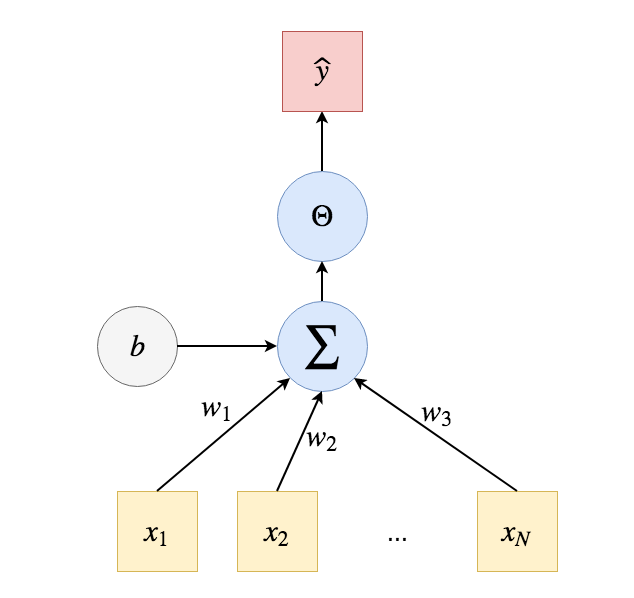

Matematicamente, traduzimos o fluxo acima como uma função de ativação cujo parâmetro é o produto vetorial dos vetores de pesos e entradas: 

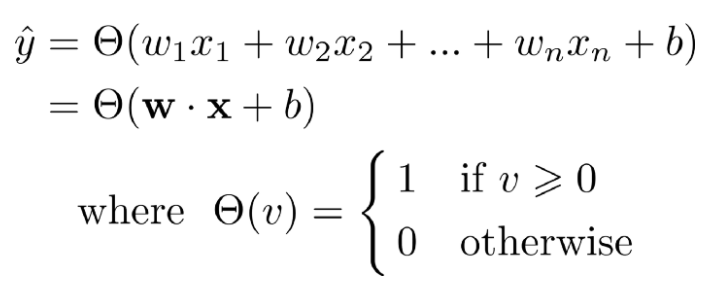



# Implementação do Percéptron em Python

In [ ]:
import numpy as np

def heaviside(v):
  if v >= 0:
    return 1
  else:
    return 0
	
def perceptron(x, w, b):
  v = np.dot(w, x) + b
  y = heaviside(v)
  return y


## Exemplo de Execução

Vamos supor que nosso neurônio possui 3 sinápses, que são nossas entradas representadas pelo vetor

$X = [x_1,x_2,x_3]$

e com pesos

$W = [w_1,w_2,w_3] = [0.5, 0.2, 0.1]$.

Como seria a saída desse modelo se sua entrada fosse $X=[0.3, 0, 1]$?

In [ ]:
x = [0.3, 0, 1]
W = [0.5, 0.2, 0.1]

y = perceptron(x,W,0)

print(y)

Só isso?! Sim! :) por enquanto...

# Caso de Uso: Implementação dos Operadores Lógicos AND, OR, NOT e XOR

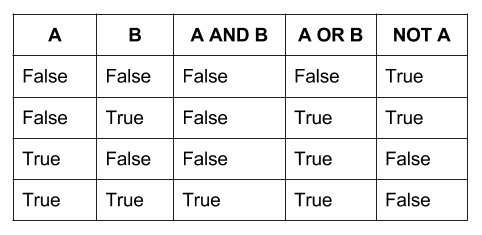

In [ ]:
inputs = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

### AND

In [ ]:
def AND_perceptron(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptron(x, w, b)

for input in inputs:
  print(f"AND({input[0]}, {input[1]}) = {AND_perceptron(input)}")

### OR

In [ ]:
def OR_perceptron(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

for input in inputs:
  print(f"OR({input[0]}, {input[1]}) = {OR_perceptron(input)}")

### NOT

In [ ]:
def NOT_perceptron(x):
	return perceptron(x, w=-1, b=0.5)

print(f"NOT(0) = {NOT_perceptron(0)}")
print(f"NOT(1) = {NOT_perceptron(1)}")

### XOR?

Exercício 1: mostrar que é impossível para o percéptron modelar o tabela-verdade XOR.

Exercício 2: implementar uma rede com os neurônios OR, AND e NOT que modela o operador XOR.

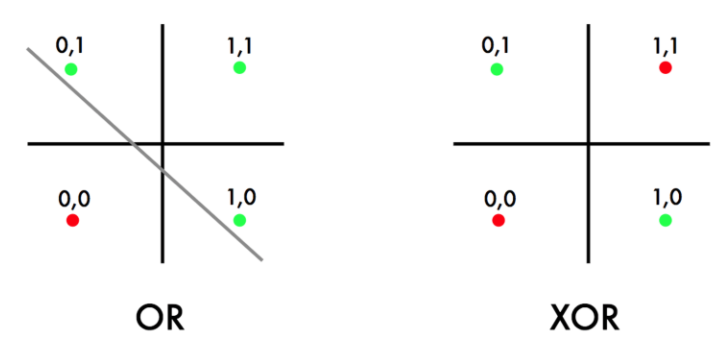

### Resposta:

__Exercício 1__: o percéptron é um separador linear. Basta mostrar que a tabela-verdade XOR não é linearmente separável.

__Exercício 2__: O XOR pode ser implementado como a rede abaixo 

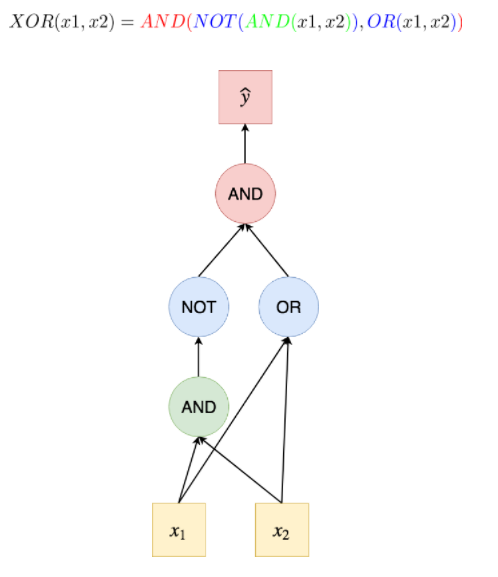

In [ ]:
def XOR_net(x):
    gate_1 = AND_perceptron(x)
    gate_2 = NOT_perceptron(gate_1)
    gate_3 = OR_perceptron(x)
    new_x = np.array([gate_2, gate_3])
    output = AND_perceptron(new_x)
    return output

In [ ]:
inputs = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

for input in inputs:
  print(f"XOR({input[0]}, {input[1]}) = {XOR_net(input)}")

# Treinamento Automático do Percéptron

### Aprendizado Supervisionado vs Não-Supervisionado

As técnicas para ajustar os pesos de uma rede neural artificial, chamadas de técnicas de _treinamento_, podem ser classificadas de acordo com o uso do conjunto de dados disponível para tal _treinamento_.

Se a rede dispõe de um conjunto de dados de entrada e saída para se "usar como exemplo", chamamos o treinamento dessa rede de __treinamento supervisionado__. A ideia de supervisão vem de alguém já está dando a resposta para o problema em determinadas situações, como fizemos nos exemplos acima, em que expomos o percéptron a todo o conjunto de entrada-saída. Muitas vezes a resposta vem de conhecimento prévio, especialista, ou alguma saída conhecida de processo.

Alguns tipos de redes neurais não necessitam de uma saída serem treinadas. Elas usam conceitos como grupos e similaridades para aprenderem. O treinamento desses modelos não necessita de uma saída definida - _supervisionada_ - e por isso o aprendizado decorrente é chamado de __não supervisionado__.

Existem outras classificações de treinamentos como os treinamentos semi-supervisionados, mas por hora vamos nos focar no primeiro tipo, o aprendizado supervisionado.

### Aprendizado do Percéptron

Para ajustar os pesos do nosso percéptron, vamos precisar de um conjunto de dados com entrada e saída conhecidas, ou seja, vamos aplicar uma técnica de aprendizado supervisionado, chamada de  _regra deaprendizado do Percéptron_.

Tal regra ajusta os pesos $w_i$ da nossa rede de acordo com a seguinte equação:

$\Delta w_{i} = \eta (p_i - y_i)*x_j$,

 em que $i\in [1,...N]$ são os índices dos pesos do percéptron e $x_j\in J$ são os dados de treinamento (entradas). Denotamos aqui o conjunto de treinamento como $J$. Aqui $p_i$ e $y_i$ são respectivamente a saída predita e a saída esperada de uma entrada $x_i$.

 O parâmetro $\eta$ é chamado de _taxa de aprendizagem_, e é efetivamente o tamanho do passo que damos na direção da melhor resposta. Vamos fixar essa taxa em 0.1.

## Implementação da Classe Perceptron

In [262]:
import numpy as np
class Perceptron:
    def __init__(self, N, eta=0.1):
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.eta = eta

    def heaviside(self, x):
        return 1 if x > 0 else 0

    def fit(self, X, Y, epochs=10):
        trigger = False
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        for epoch in range(0, epochs):
            for (x, y) in zip(X, Y):
                p = self.heaviside(np.dot(x, self.W))
                if p != y:
                    error = p - y
                    self.W += -self.eta * error * x
    def predict(self, X, addBias=True):
        X = np.atleast_2d(X)
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        return self.heaviside(np.dot(X, self.W))

### Treinamento do Percéptron no conjunto de dados do operador OR

In [263]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

In [264]:
X.shape[1]

2

In [265]:
p = Perceptron(X.shape[1], eta=0.1)

In [266]:
p.fit(X, y, epochs=20)

In [267]:
for (x, target) in zip(X, y):
    pred = p.predict(x)
    print(f"[INFO] X={x}, Y={target[0]}, y_pred={pred}")

[INFO] X=[0 0], Y=0, y_pred=0
[INFO] X=[0 1], Y=1, y_pred=1
[INFO] X=[1 0], Y=1, y_pred=1
[INFO] X=[1 1], Y=1, y_pred=1


## Exercícios

1. Inclua alguns prints na função fit do percéptron para entender o avanço dos parâmetros conforme o treinamento avança. Vocês conseguem tirar alguma coisa desses parâmetros (w,p, y-p...)?

2. Notou que o número de épocas implementado foi maior do que o necessário? Pesquise maneiras de encontrar um bom número de épocas na literatura e implemente o parâmetro __epochs__ dinamicamente.

3. Vamos agora monitorar o treinamento de nosso modelo. Plote um gráfico de __epoch__ (eixo x) por __RMSE__ (eixo y, a raíz do erro médio quadrático entre o valor real de y e predito). Analise o gráfico gerado. Ele é puramente decrescente? 

4. Brinque com os parâmetros. Estude na literatura maneiras de otimizá-los
e até automatizá-los, se possível, e escreva um resumo dos seus achados :)

### Resposta do exercício 1: 

Inclua alguns prints na função fit do percéptron para entender o avanço dos parâmetros conforme o treinamento avança. Vocês conseguem tirar alguma coisa desses parâmetros (w,p, y-p...)?

In [152]:
# Classe modificada
import numpy as np
class Perceptron:
    def __init__(self, N, eta=0.1):
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.eta = eta

    def heaviside(self, x):
        return 1 if x > 0 else 0

    def fit(self, X, Y, epochs=10):
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        for epoch in range(0, epochs):
            print(f"------\nEpoch: {epoch}")
            old_w = np.copy(self.W)
            for (x, y) in zip(X, Y):
                p = self.heaviside(np.dot(x, self.W))
                if p != y:
                    error = p - y
                    print(f"Do {self.W}")
                    self.W += -self.eta * error * x
                    print(f"Até {self.W}\n--")

    def predict(self, X, addBias=True):
        X = np.atleast_2d(X)
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        return self.heaviside(np.dot(X, self.W))

In [153]:
# Treinamento
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
p = Perceptron(X.shape[1], eta=0.1)
p.fit(X, y, epochs=20)

------
Epoch: 0
Do [ 0.19023909 -0.81060981 -0.74606719]
Até [ 0.19023909 -0.71060981 -0.64606719]
--
Do [ 0.19023909 -0.71060981 -0.64606719]
Até [ 0.29023909 -0.71060981 -0.54606719]
--
Do [ 0.29023909 -0.71060981 -0.54606719]
Até [ 0.39023909 -0.61060981 -0.44606719]
--
------
Epoch: 1
Do [ 0.39023909 -0.61060981 -0.44606719]
Até [ 0.39023909 -0.51060981 -0.34606719]
--
Do [ 0.39023909 -0.51060981 -0.34606719]
Até [ 0.49023909 -0.41060981 -0.24606719]
--
------
Epoch: 2
Do [ 0.49023909 -0.41060981 -0.24606719]
Até [ 0.49023909 -0.31060981 -0.14606719]
--
------
Epoch: 3
Do [ 0.49023909 -0.31060981 -0.14606719]
Até [ 0.49023909 -0.21060981 -0.04606719]
--
------
Epoch: 4
Do [ 0.49023909 -0.21060981 -0.04606719]
Até [ 0.49023909 -0.11060981  0.05393281]
--
------
Epoch: 5
Do [ 0.49023909 -0.11060981  0.05393281]
Até [ 0.49023909 -0.11060981 -0.04606719]
--
Do [ 0.49023909 -0.11060981 -0.04606719]
Até [ 0.49023909 -0.01060981  0.05393281]
--
------
Epoch: 6
Do [ 0.49023909 -0.01060981 

### Resposta para o exercício 2:

Notou que o número de épocas implementado foi maior do que o necessário? Pesquise maneiras de encontrar um bom número de épocas na literatura e implemente o parâmetro __epochs__ dinamicamente.

In [249]:
# Classe modificada
import numpy as np
class Perceptron:
    def __init__(self, N, eta=0.1):
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.eta = eta

    def heaviside(self, x):
        return 1 if x > 0 else 0

    def fit(self, X, Y, epochs=10):
        trigger = False
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        for epoch in range(0, epochs):
            print(f"------\nEpoch: {epoch}")
            old_w = np.copy(self.W)
            for (x, y) in zip(X, Y):
                p = self.heaviside(np.dot(x, self.W))
                if p != y:
                    error = p - y
                    print(f"Do {self.W}")
                    self.W += -self.eta * error * x
                    print(f"Até {self.W}\n--")
            # Se parámetros não mudam por 1 epoch, parar o treinamento
            if np.array_equal(self.W, old_w):
                break
    def predict(self, X, addBias=True):
        X = np.atleast_2d(X)
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        return self.heaviside(np.dot(X, self.W))

O método aplicado é chamado de *early stopping* ou parada antecipada, e consiste em parar o treinamento assim que detectar nenhuma mudança nos parámetros entre um epoch e outro depois de um certo número de epochs, ou quando começa haver uma divergência entre os valores de treinamento e validação.

Fontes:
* https://en.wikipedia.org/wiki/Early_stopping
* https://medium.com/@pedro.bloss.braga/deep-learning-estrutura-básica-e-aspectos-teóricos-79e2b7fa774d

In [251]:
# Treinamento. Imprime "Sem mudanças. Parar o treinamento" no final
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
p = Perceptron(X.shape[1], eta=0.1)
p.fit(X, y, epochs=20)
print("Sem mudanças. Parar o treinamento")

------
Epoch: 0
Do [0.15371755 0.54331165 1.36909155]
Até [0.15371755 0.54331165 1.26909155]
--
------
Epoch: 1
Do [0.15371755 0.54331165 1.26909155]
Até [0.15371755 0.54331165 1.16909155]
--
------
Epoch: 2
Do [0.15371755 0.54331165 1.16909155]
Até [0.15371755 0.54331165 1.06909155]
--
------
Epoch: 3
Do [0.15371755 0.54331165 1.06909155]
Até [0.15371755 0.54331165 0.96909155]
--
------
Epoch: 4
Do [0.15371755 0.54331165 0.96909155]
Até [0.15371755 0.54331165 0.86909155]
--
------
Epoch: 5
Do [0.15371755 0.54331165 0.86909155]
Até [0.15371755 0.54331165 0.76909155]
--
------
Epoch: 6
Do [0.15371755 0.54331165 0.76909155]
Até [0.15371755 0.54331165 0.66909155]
--
------
Epoch: 7
Do [0.15371755 0.54331165 0.66909155]
Até [0.15371755 0.54331165 0.56909155]
--
------
Epoch: 8
Do [0.15371755 0.54331165 0.56909155]
Até [0.15371755 0.54331165 0.46909155]
--
------
Epoch: 9
Do [0.15371755 0.54331165 0.46909155]
Até [0.15371755 0.54331165 0.36909155]
--
------
Epoch: 10
Do [0.15371755 0.543311

### Resposta para o exercício 3: 

Vamos agora monitorar o treinamento de nosso modelo. Plote um gráfico de epoch (eixo x) por RMSE (eixo y, a raíz do erro médio quadrático entre o valor real de y e predito). Analise o gráfico gerado. Ele é puramente decrescente?

In [268]:
import matplotlib.pyplot as plt


# Classe modificada (sem o early stopping)
import numpy as np
class Perceptron:
    def __init__(self, N, eta=0.1):
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.eta = eta

    def heaviside(self, x):
        return 1 if x > 0 else 0

    def fit(self, X, Y, epochs=10):
        eps = []
        rmse_h = []
        trigger = False
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        for epoch in range(0, epochs):
            old_w = np.copy(self.W)
            for (x, y) in zip(X, Y):
                p = self.heaviside(np.dot(x, self.W))
                if p != y:
                    error = p - y
                    self.W += -self.eta * error * x
                    # calcular a raíz do erro quadrático médio
                    y_hat = self.heaviside(np.dot(x, self.W))
                    rmse = np.square(np.subtract(y, y_hat)).mean()
            # Recordar o epoch e o último rmse do epoch
            eps.append(epoch)
            rmse_h.append(rmse)
        return eps, rmse_h
    def predict(self, X, addBias=True):
        X = np.atleast_2d(X)
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        return self.heaviside(np.dot(X, self.W))

In [247]:
# Treinamento
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
p = Perceptron(X.shape[1], eta=0.1)
epochs, rmse = p.fit(X, y, epochs=20)

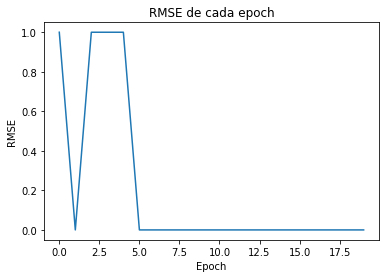

In [248]:
# Gráfica de erros quadráticos médios do treinamento
plt.plot(epochs, rmse)
plt.title("RMSE de cada epoch")
plt.ylabel("RMSE")
plt.xlabel("Epoch");

Vemos que o erro quadráticos médio não é necesariamente decrescente com cada epoch treinado, mas eventualemente chega a um error de 0 constante nos últimos epochs.

### Resposta à pergunta 4: 

Brinque com os parâmetros. Estude na literatura maneiras de otimizá-los e até automatizá-los, se possível, e escreva um resumo dos seus achados :)

**1. O modelo converge mais rápido com o valor do *eta* mais elevado**

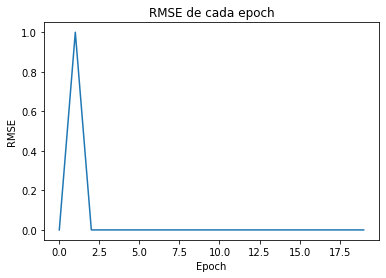

In [269]:
# Treinamento
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
# Eta de 0.9
p = Perceptron(X.shape[1], eta=0.9)
epochs, rmse = p.fit(X, y, epochs=20)
# Gráfica de erros quadráticos médios do treinamento
plt.plot(epochs, rmse)
plt.title("RMSE de cada epoch")
plt.ylabel("RMSE")
plt.xlabel("Epoch");

**2. Por outro lado, o modelo de perceptron não consegue diminuir o RMSE com o valor do *eta* menor, ou talvez necessite de mais epochs para convergir.**

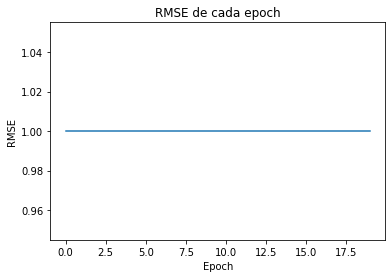

In [261]:
# Treinamento
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
# Eta de 0.01
p = Perceptron(X.shape[1], eta=0.01)
epochs, rmse = p.fit(X, y, epochs=20)
# Gráfica de erros quadráticos médios do treinamento
plt.plot(epochs, rmse)
plt.title("RMSE de cada epoch")
plt.ylabel("RMSE")
plt.xlabel("Epoch");